In [37]:
import pandas as pd
file_path = "C:/Users/17376/Desktop/CYX/学习/5243 Applied DS/Project1/cleaned_data_v3.csv"
df = pd.read_csv(file_path)
print(df.head())

   2017.NAICS.Code                                   2017.NAICS.Title  \
0             -inf            Translation and Interpretation Services   
1             -inf  Plastics Materials and Basic Forms and Shapes ...   
2             -inf                                     Dance Companie   
3       -9999999.0                           Farm Management Services   
4       -9999999.0       Other Chemical and Fertilizer Mineral Mining   

        GHG                               Unit  \
0  All GHGs  kg CO2e/2022 USD, purchaser price   
1  All GHGs  kg CO2e/2022 USD, purchaser price   
2  All GHGs  kg CO2e/2022 USD, purchaser price   
3   All GHG  kg CO2e/2022 USD, purchaser price   
4  All GHGs  kg CO2e/2022 USD, purchaser price   

   Supply.Chain.Emission.Factors.without.Margins  \
0                                          0.080   
1                                          0.144   
2                                          0.086   
3                                          0.384   


In [39]:
# Display general information about the dataset
print(df.info())
# Summary statistics for numerical columns
print(df.describe())
# Summary statistics for categorical columns
print(df.describe(include=['object']))
# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017.NAICS.Code                                1081 non-null   float64
 1   2017.NAICS.Title                               1082 non-null   object 
 2   GHG                                            1082 non-null   object 
 3   Unit                                           1082 non-null   object 
 4   Supply.Chain.Emission.Factors.without.Margins  1082 non-null   float64
 5   Margins.of.Supply.Chain.Emission.Factors       1082 non-null   float64
 6   Supply.Chain.Emission.Factors.with.Margins     1082 non-null   float64
 7   Reference.USEEIO.Code                          1082 non-null   object 
dtypes: float64(4), object(4)
memory usage: 67.8+ KB
None
       2017.NAICS.Code  Supply.Chain.Emission.Factors.without.Margins  \
cou

C:\Users\17376\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

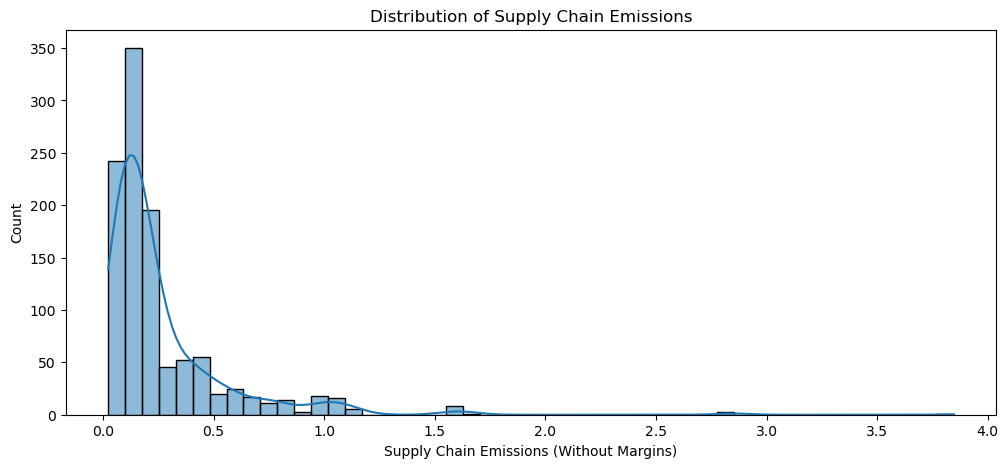

In [43]:
# Plot distribution of emissions
plt.figure(figsize=(12, 5))
sns.histplot(df["Supply.Chain.Emission.Factors.without.Margins"], bins=50, kde=True)
plt.xlabel("Supply Chain Emissions (Without Margins)")
plt.title("Distribution of Supply Chain Emissions")
plt.show()

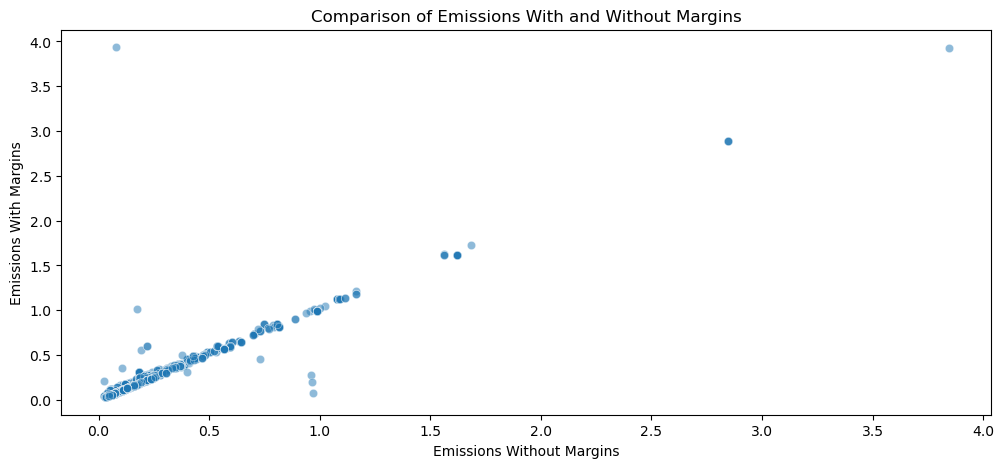

In [45]:
# Compare "without margins" vs. "with margins"
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=df["Supply.Chain.Emission.Factors.without.Margins"], 
    y=df["Supply.Chain.Emission.Factors.with.Margins"], 
    alpha=0.5
)
plt.xlabel("Emissions Without Margins")
plt.ylabel("Emissions With Margins")
plt.title("Comparison of Emissions With and Without Margins")
plt.show()

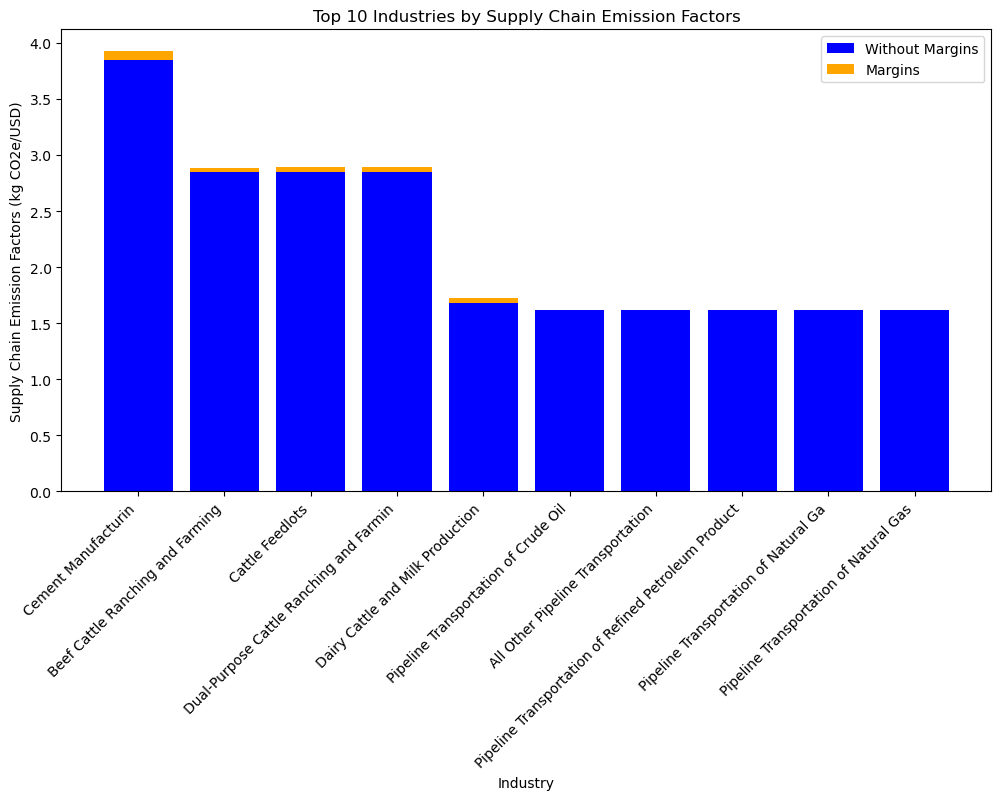

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values(by=df.columns[4], ascending=False).head(top_n)
industry_names = df_sorted.iloc[:, 1]

plt.figure(figsize=(12, 6))
plt.bar(industry_names, df_sorted.iloc[:, 4], label="Without Margins", color="blue")
plt.bar(industry_names, df_sorted.iloc[:, 5], label="Margins", color="orange", bottom=df_sorted.iloc[:, 4])

plt.xlabel("Industry")
plt.ylabel("Supply Chain Emission Factors (kg CO2e/USD)")
plt.title(f"Top {top_n} Industries by Supply Chain Emission Factors")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()



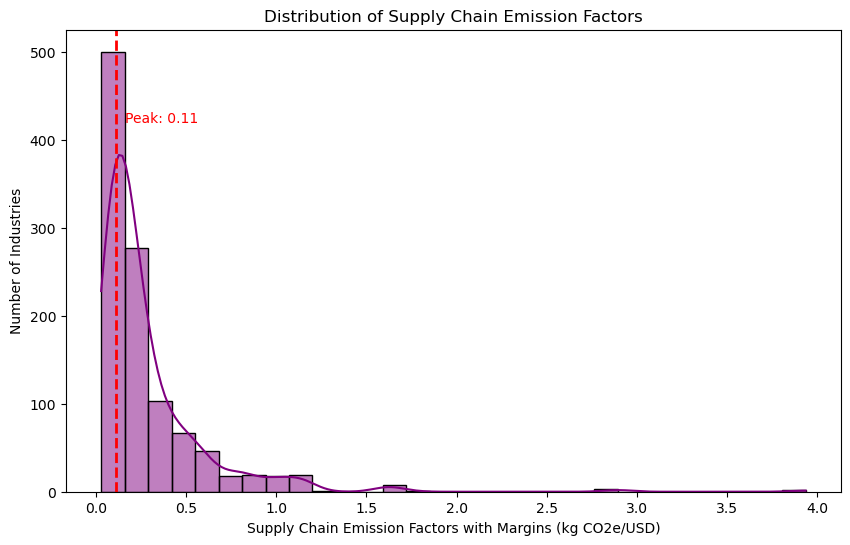

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df.iloc[:, 6], bins=30, kde=True, color="purple")  # Supply Chain Emission Factors with Margins
peak_value = df.iloc[:, 6].mode()[0]
plt.axvline(peak_value, color='red', linestyle='dashed', linewidth=2)
plt.text(peak_value + 0.05, plt.ylim()[1] * 0.8, f'Peak: {peak_value:.2f}', color='red')
plt.xlabel("Supply Chain Emission Factors with Margins (kg CO2e/USD)")
plt.ylabel("Number of Industries")
plt.title("Distribution of Supply Chain Emission Factors")
plt.show()

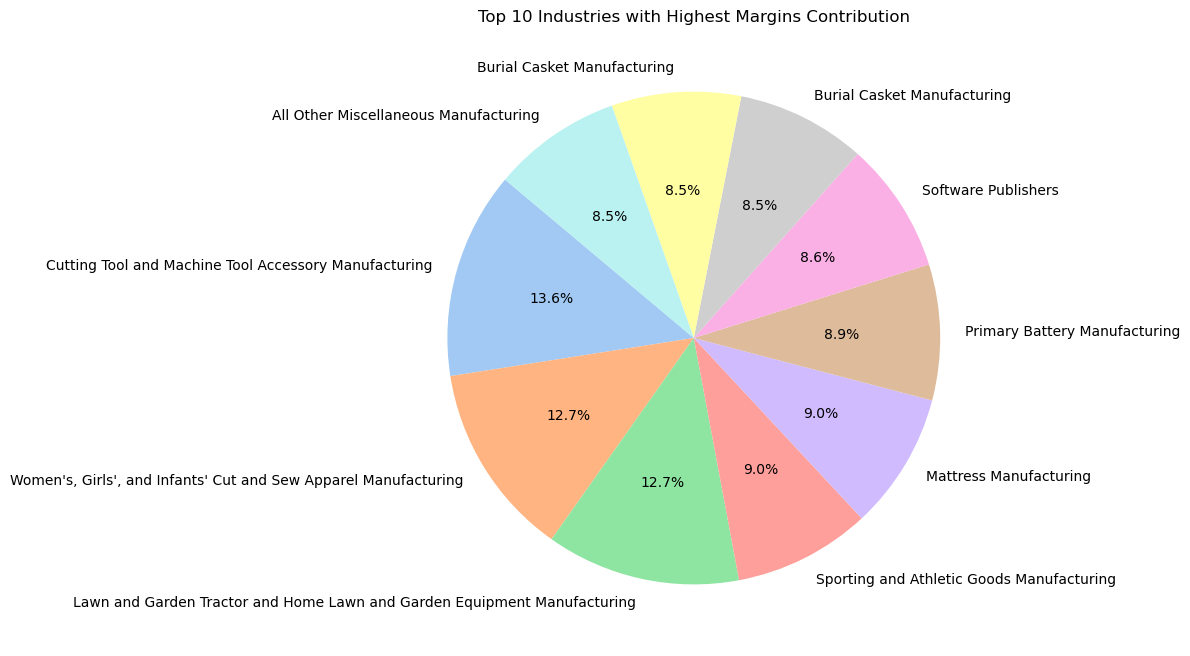

In [53]:
df["Margins Percentage"] = (df.iloc[:, 5] / df.iloc[:, 6]) * 100
df_top_margins = df.sort_values(by="Margins Percentage", ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(df_top_margins["Margins Percentage"], labels=df_top_margins.iloc[:, 1], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title("Top 10 Industries with Highest Margins Contribution")
plt.show()


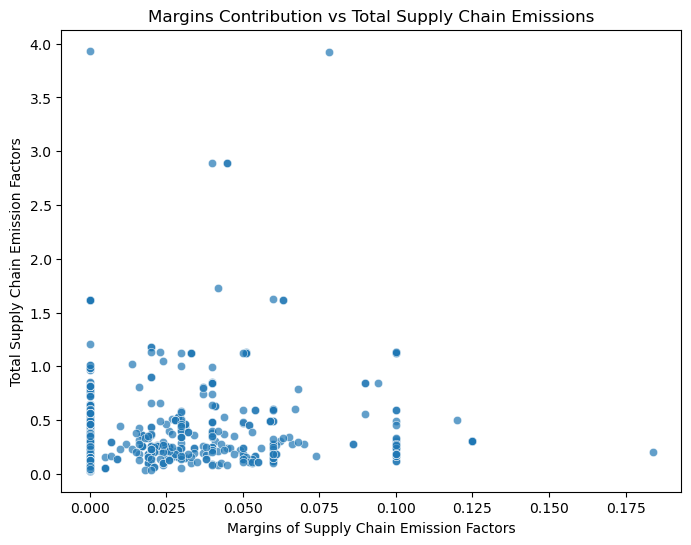

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 5], y=df.iloc[:, 6], alpha=0.7)

plt.xlabel("Margins of Supply Chain Emission Factors")
plt.ylabel("Total Supply Chain Emission Factors")
plt.title("Margins Contribution vs Total Supply Chain Emissions")
plt.show()


                                        OLS Regression Results                                        
Dep. Variable:     Supply.Chain.Emission.Factors.with.Margins   R-squared:                       0.057
Model:                                                    OLS   Adj. R-squared:                  0.057
Method:                                         Least Squares   F-statistic:                     65.82
Date:                                        Sun, 16 Feb 2025   Prob (F-statistic):           1.33e-15
Time:                                                21:42:36   Log-Likelihood:                -329.07
No. Observations:                                        1082   AIC:                             662.1
Df Residuals:                                            1080   BIC:                             672.1
Df Model:                                                   1                                         
Covariance Type:                                    nonrobust            

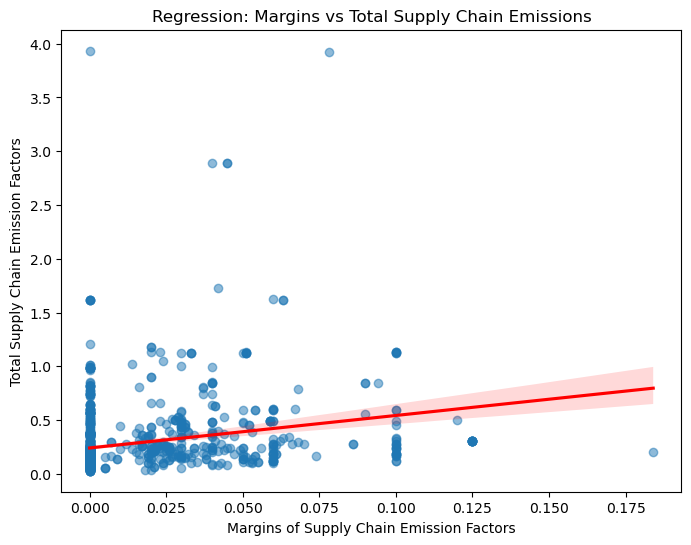

In [57]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 提取数据
X = df.iloc[:, 5]  # Margins of Supply Chain Emission Factors
y = df.iloc[:, 6]  # Total Supply Chain Emission Factors

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
sns.regplot(x=df.iloc[:, 5], y=df.iloc[:, 6], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.xlabel("Margins of Supply Chain Emission Factors")
plt.ylabel("Total Supply Chain Emission Factors")
plt.title("Regression: Margins vs Total Supply Chain Emissions")
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

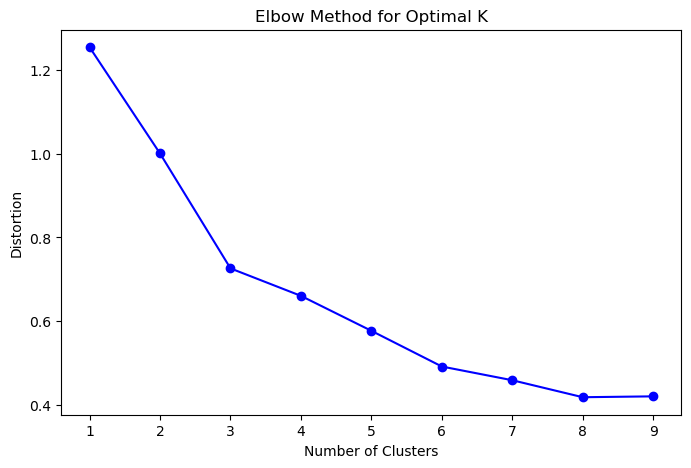

C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


features = df.iloc[:, 4:7]  #  Supply Chain Emission Factors without/with Margins and Margins

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

distortions = []
K = range(1, 10) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    distortions.append(sum(np.min(cdist(scaled_features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_features.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

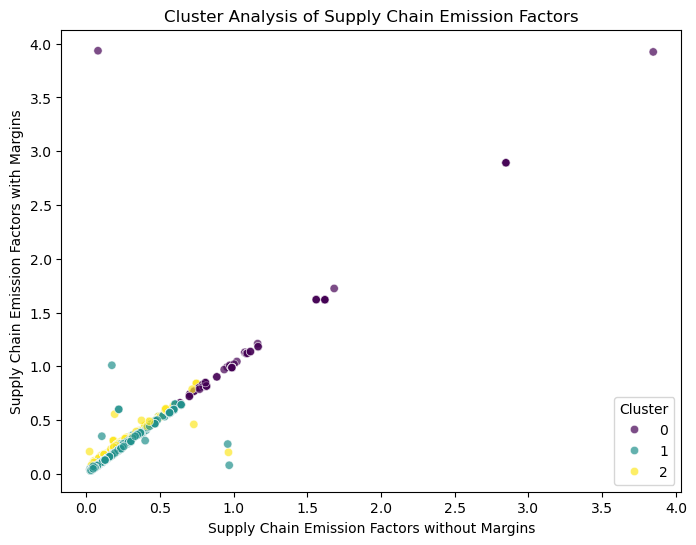

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 4], y=df.iloc[:, 6], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Supply Chain Emission Factors without Margins")
plt.ylabel("Supply Chain Emission Factors with Margins")
plt.title("Cluster Analysis of Supply Chain Emission Factors")
plt.legend(title="Cluster")
plt.show()

In [63]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

cluster_means = df.groupby('Cluster')[df.columns[4:7]].mean()
print(cluster_means)

Cluster
1    811
2    185
0     86
Name: count, dtype: int64
         Supply.Chain.Emission.Factors.without.Margins  \
Cluster                                                  
0                                             1.071884   
1                                             0.175210   
2                                             0.278292   

         Margins.of.Supply.Chain.Emission.Factors  \
Cluster                                             
0                                        0.022919   
1                                        0.002947   
2                                        0.060432   

         Supply.Chain.Emission.Factors.with.Margins  
Cluster                                              
0                                          1.144605  
1                                          0.182461  
2                                          0.329562  


C:\Users\17376\AppData\Local\Temp\ipykernel_23816\2455745489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df.iloc[:, 6], palette="Set2")


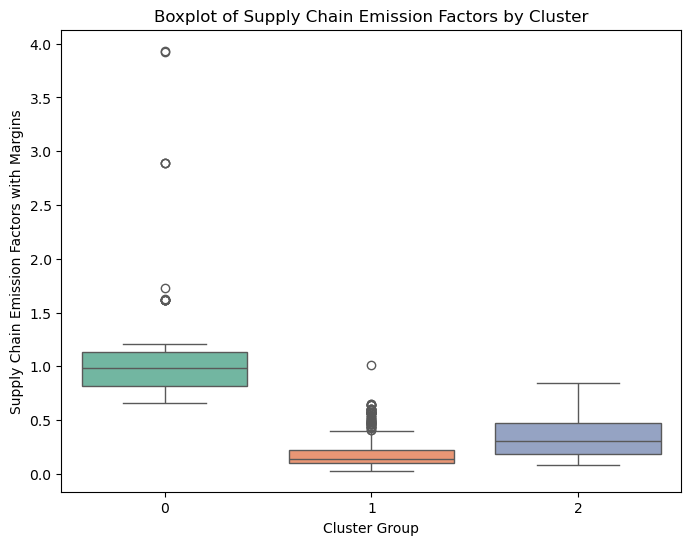

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cluster'], y=df.iloc[:, 6], palette="Set2")
plt.xlabel("Cluster Group")
plt.ylabel("Supply Chain Emission Factors with Margins")
plt.title("Boxplot of Supply Chain Emission Factors by Cluster")
plt.show()
